# Regresión lineal

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets, linear_model #datasets y modelos de aprendizaje automático (ML)
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from scipy import stats #para poder hacer cálculos científicos --> valores p
import statsmodels.api as sm

## Preparación de los datos

Vamos a cargar en un **dataframe** de ***pandas*** un datset muy utilizado para explicar conceptos de aprendizaje del repositorio de Machine Learning alojado en la Universidad De California en Irvine (UCI), que contiene información acerca de automóviles y su rendimiento en millas por galón (MPG).

In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)
data.head()

(406, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


Hay 406 registros con 9 variables.
Vamos a analizar si hay problemas de datos con respecto a valores faltantes y outliers

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displacement,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


Al parecer a primera vista no hay outliers, pero si hay valores faltantes (columna count no es de 406 para todas las variables).

Además podemos ver que las escalas de las variables son bastante disparejas, con los valores de peso que van de 1600 a 5100, y los de los cilidros de 3 a 8. Es necesario reescalar los datos para otorgarle la misma importancia a cada variable dentro del modelo.

### Vamos a ver que variables tienen valores faltantes

In [4]:
pd.isnull(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [5]:
print(pd.isnull(data).any(0)) #el 0 implica cualquier columna, si quisieramos las filas utilizamos 1
print("Las columnas que tienen valores faltantes son: ",pd.isnull(data).any(0).nonzero()[0])
print("y corresponden a: ", data.columns[pd.isnull(data).any(0).nonzero()[0]])

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model           False
origin          False
car_name        False
dtype: bool
Las columnas que tienen valores faltantes son:  [0 3]
y corresponden a:  Index(['mpg', 'horsepower'], dtype='object')


Tanto mpg como horsepower tienen valores faltantes, pero no son muchos.
Hay al menos 8 registros con valores faltantes.

Podemos encontrar los índices de las filas con los valores faltantes y eliminarlos del dataset.
También podemos directamente eliminarlos con un comando de pandas.
Vamos a hacer las dos operaciones.

Encontramos entonces los índices con registros incompletos.

In [6]:
indices = pd.isnull(data).any(1).nonzero()[0]
print("Hay {} registros incompletos: ".format(len(indices)), indices)

Hay 14 registros incompletos:  [ 10  11  12  13  14  17  38  39 133 337 343 361 367 382]


In [7]:
data2 = data.drop(indices)
print("Datos originales: ", data.shape)
print("Datos limpios y completos: ", data2.shape)
print("Se eliminaron {} registos".format(data.shape[0] - data2.shape[0]))

Datos originales:  (406, 9)
Datos limpios y completos:  (392, 9)
Se eliminaron 14 registos


También lo podemos hacer directamente con **dropna**

In [8]:
data2 = data.dropna()
print("Datos originales: ", data.shape)
print("Datos limpios y completos: ", data2.shape)
print("Se eliminaron {} registos".format(data.shape[0] - data2.shape[0]))

Datos originales:  (406, 9)
Datos limpios y completos:  (392, 9)
Se eliminaron 14 registos


In [9]:
data = data2

## Aprendizaje del modelo de regresión

Vamos a crear un modelo de regresión lineal que permita obtener *mpg* a partir de algunas (5 de ellas) de las demás variables independientes del dataset

In [10]:
indep_vars = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
dep_vars = ['mpg']

In [13]:
X = data[indep_vars]
y = data[dep_vars]

Tenemos un dataframe con los datos de las variables independientes y otro con los de la variables dependiente.

Ya tenemos todos los datos preparados para lanzar el modelo de regresión lineal a partir de los datos de entrenamiento.
Lanzamos el método **fit** que se encarga de encontrar la mejor línea de ajuste, y consultamos los diferentes coeficientes encontrados para las variables independientes.

Nótese que creamos a continuación un modelo de regresión lineal que va a **normalizar** los datos de entrada.
La regresión lineal simple es invariante con respecto a la escala de los predictores. Sin embargo, es aconsejable normalizar los datos, pues esto permite que los coeficientes sean comparables en su magnitud, para poder tener una idea más clara de cuáles son las variables predictoras mas influyentes.
Además, así no tenga efecto en la calidad del modelo de la regresión lineal por mínimos cuadrados, otros modelos relacionados como la regresión logística, la regresión Ridge y la regresión Lasso, si son sensibles a las escalas de las variables independientes.

In [14]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Se estableció que se va a utilizar un modelo de regresión lineal, que por defecto incluye un coeficiente para la intercepción con la ordenada en el origen, y que normaliza los datos de las variables predictivas

In [15]:
for var, coef in zip(indep_vars, np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

cylinders: -0.3979283590642205
displacement: -8.313012222570444e-05
horsepower: -0.04525708015084001
weight: -0.0051869173476110945
acceleration: -0.029104713990184494
intercepción: 46.26430785257118


## Predicción

Vamos a predecir la variable dependiente ajustada según el modelo para los datos de entrenamiento y para los datos de test

In [16]:
y_pred = regr.predict(X)
print(y_pred.shape)

(392, 1)


Veamos como nos va con las métricas de bondad de ajuste

In [17]:
print("MSE: %.4f" % mean_squared_error(y, y_pred))
print('R2 : %.4f' % r2_score(y, y_pred))

MSE: 17.7614
R2 : 0.7077


scikit-learn no ofrece el cálculo del R2 ajustado, por lo que lo calculamos a mano:

In [18]:
r2_aj = 1 - (1-r2_score(y, y_pred))*(len(y)-1) / (len(y) - X.shape[1] - 1)
print('R2 adj: %.4f' %r2_aj)

R2 adj: 0.7039


El valor del R2 ajustado corrige el valor del R2 con respecto a la complejidad dada por el número de variables independientes utilizadas, y permite comparar modelos de diferente número de predictores.

## Análisis de los coeficientes 

In [19]:
indep_vars

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

Para poder establecer la significancia de los coeficientes, es necesario realizar pruebas de hipótesis de los coeficientes de cada variable predictiva, comparándolos contra 0.

El problema es que **scikit-learn** no realiza estas pruebas, y no incluye muchas de las métricas (como el R2 ajustado), y hay que utilizar el package **statsmodel**.


Por ejemplo, si queremos los valores *p* de los coeficientes, es necesario calcularlos a mano, ayudándose de la librería **scipy**

In [20]:
# Calculamos la significancia de los coeficientes
# Definimos los datos con una columna inicial para representar la ordenada en el origen
newX = np.append(np.ones((len(X),1)), X, axis=1)
print(newX)

#Calculamos el MSE ajustado (a los 500 datos le sustraemos los 3 del número de predictores)
MSE_adj = (np.sum((y-y_pred)**2))/(len(newX)-len(newX[0]))
print("Mean squared error corregido: %.8f" %MSE_adj)

var_b = np.array(MSE_adj)*np.linalg.inv(np.dot(newX.T,newX)).diagonal()
sd_b = np.sqrt(var_b)
params = np.append(regr.intercept_, regr.coef_)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
p_values

[[1.000e+00 8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01]
 [1.000e+00 8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01]
 [1.000e+00 8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01]
 ...
 [1.000e+00 4.000e+00 1.350e+02 8.400e+01 2.295e+03 1.160e+01]
 [1.000e+00 4.000e+00 1.200e+02 7.900e+01 2.625e+03 1.860e+01]
 [1.000e+00 4.000e+00 1.190e+02 8.200e+01 2.720e+03 1.940e+01]]
Mean squared error corregido: 18.03747998


[0.0,
 0.3330096674594296,
 0.992693285871997,
 0.006896606868139532,
 5.929352564493229e-10,
 0.8171031046637907]

Este proceso es bastante complicado, por lo que es a veces mejor conocer como obtenerlos directamente, por lo que usamos el package **statsmodels**.

Si queremos el coeficiente del intercepto con **statsmodels**, es necesario adicionar una constante inicial a los datos predictores

In [21]:
X2 = sm.add_constant(X)
print(X2.head())

   const  cylinders  displacement  horsepower  weight  acceleration
0    1.0        8.0         307.0       130.0  3504.0          12.0
1    1.0        8.0         350.0       165.0  3693.0          11.5
2    1.0        8.0         318.0       150.0  3436.0          11.0
3    1.0        8.0         304.0       150.0  3433.0          12.0
4    1.0        8.0         302.0       140.0  3449.0          10.5


In [22]:
modeloStats = sm.OLS(y, X2)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Mon, 27 Aug 2018   Prob (F-statistic):          9.82e-101
Time:                        18:37:12   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Encontramos que los parámetros cylinders, displacement y acceleration no son para nada significativos en el modelo cuando consideramos todas las variables.

También podemos ver que puede que haya problemas de multicolinearidad, como lo establece la 2a advertencia. Vamos a analizar la correlación entre las variables incluidas en el modelo.

In [25]:
# Calculamos la matriz de correlaciones
corr = X.join(y).corr()
corr

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


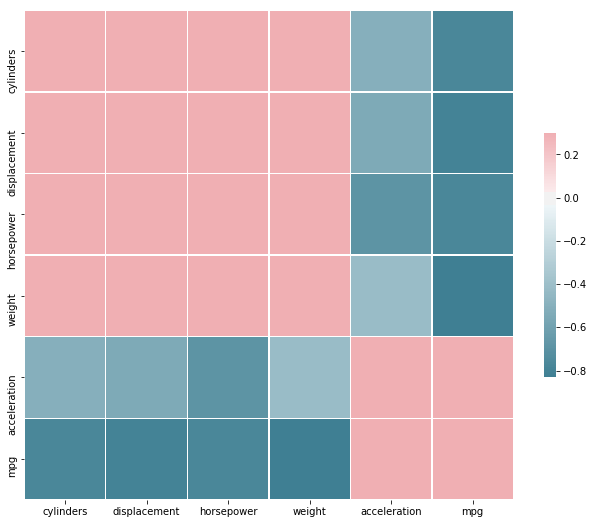

In [26]:
## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Encontramos que *aceleration* está bastante correlacionada con las primeras cuatro variables independientes. Podríamos eliminarla y correr el modelo otra vez, pero vamos a preferir seguir un proceso más organizado de forward stepwise.

## Escogencia de variables

Empezamos por escoger como primera variable *weight*, pues es la que tiene la correlación más importante con *mpg*. Cabe anotar que en lo que sigue vamos a evaluar la calidad del modelo con el mismo conjunto de datos con los que se aprende. Esto nunca se debe hacer, pués se está subestimando el error real del modelo, pues **no estamos viendo cómo se generaliza a datos diferentes a los encontrados durante el proceso de aprendizaje**. Puede que el modelo esté en situación de **overfitting (sobre aprendizaje)** y no lo podemos detectar al evaluar con el trainin set. Esto lo corregiremos más adelante cuando veamos los diferentes **protocolos de evaluación**.

In [28]:
X2 = X[['weight']]
X2 = sm.add_constant(X2)
modeloStats = sm.OLS(y, X2)
results = modeloStats.fit();
print(results.rsquared_adj)

0.691842306026063


Partimos entonces de un R2 ajustado de 0.692.
Buscamos la siguiente mejor variable a agregar a *weight*

In [34]:
var_escogidas = ['weight']
var_intentar = ['cylinders', 'displacement', 'horsepower', 'acceleration']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    X2 = X[var_modelo]
    X2 = sm.add_constant(X2)
    modeloStats = sm.OLS(y, X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.6959080421673767, 0.6974190581758475, 0.7048656350343583, 0.6981539609651755]
['weight', 'horsepower']


Encontramos que el agregar *horsepower* a *weight* nos hace llegar el R2 ajustado a un valor de 0.7049.

Buscamos la siguiente mejor variable a agregar a *weight* y *horsepower*

In [35]:
var_escogidas = ['weight', 'horsepower']
var_intentar = ['cylinders', 'displacement', 'acceleration']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    X2 = X[var_modelo]
    X2 = sm.add_constant(X2)
    modeloStats = sm.OLS(y, X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7053914708152265, 0.7046896611177529, 0.7041051933641558]
['weight', 'horsepower', 'cylinders']


En este caso *cylinders* es la mejor variable, a un valor de 0.7054.

In [37]:
var_escogidas = ['weight', 'horsepower']
var_intentar = ['displacement', 'acceleration']

r2_aj_stepwise = []
max_r2 = 0;
for nueva_var in var_intentar:
    var_modelo=np.append(var_escogidas, nueva_var)
    X2 = X[var_modelo]
    X2 = sm.add_constant(X2)
    modeloStats = sm.OLS(y, X2)
    results = modeloStats.fit();
    if results.rsquared_adj > max_r2:
        max_r2 = results.rsquared_adj
        var_escogida = nueva_var
    r2_aj_stepwise.append(results.rsquared_adj)
print(r2_aj_stepwise)
var_escogidas.append(var_escogida)
print(var_escogidas)

[0.7046896611177529, 0.7041051933641558]
['weight', 'horsepower', 'displacement']


Encontramos ahora que la mejor variable es *displacement*, pero tenemos un retroceso con respecto al modelo anterior. Nos quedamos entonces con las tres variables predictoras: {*weight, horsepower, displacement*}

In [33]:
var_escogidas = ['weight', 'horsepower', 'displacement']
X2 = X[var_escogidas]
X2 = sm.add_constant(X2)
modeloStats = sm.OLS(y, X2)
results = modeloStats.fit();
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 27 Aug 2018   Prob (F-statistic):          3.06e-104
Time:                        18:40:39   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Análisis de los supuestos

### Linealidad de la relación entre variables independientes y variable dependiente

Solo consideramos las 3 variables independientes escogidas

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X[var_escogidas], y)
y_pred=regr.predict(X[var_escogidas])

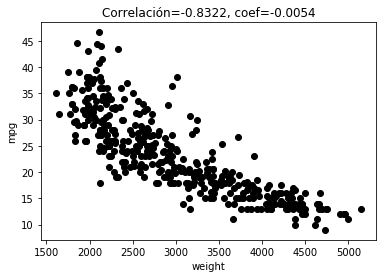

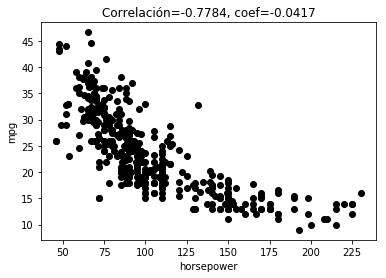

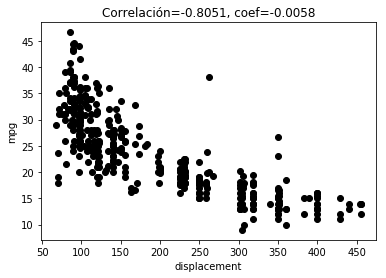

In [40]:
index = 0
for indep in var_escogidas:
    plt.scatter(X[indep], y,  color='black')
    plt.xlabel(indep)
    plt.ylabel("mpg")
    plt.title("Correlación=%.4f, coef=%.4f" % (corr['mpg'][indep_vars.index(indep)], np.squeeze(regr.coef_)[index]))
    plt.show()
    index+=1

Vemos que las relaciones son decrecientes, con un patron ligeramente convexo. Sin embargo, no es suficientemente pronunciada.

Vamos a plotear los residuos de las regresiones de los data sets.

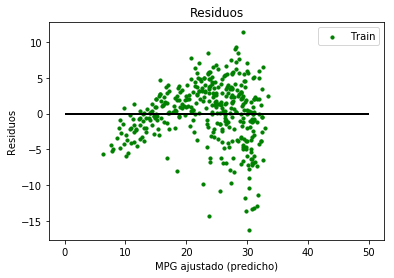

In [46]:
# Plot de los residuos del set de entrenamiento contra los valores ajustados
plt.scatter(y_pred, y_pred - y, color = "green", s = 10, label = 'Train')
plt.xlabel("MPG ajustado (predicho)")
plt.ylabel("Residuos")
# Ploteo de la linea de residuos nulos y=0
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
plt.legend(loc = 'upper right')
plt.title("Residuos")
plt.show()

Vemos que hay un patron con una curvatura concava que podría eventualmente arreglarse con una transformación polinómica.

### Normalidad de los residuos

Volvemos a entrenar el modelo utilizando los predictores escogidos, y calculamos los residuos.

Hay que tener en cuenta que estos tests son bastante rígidos y es difícil no rechazar la hipótesis nula de igualidad.

In [47]:
regr = linear_model.LinearRegression()
regr.fit(X[var_escogidas], y)
train_y_pred=regr.predict(X[var_escogidas])

In [48]:
residuos = np.array(y - y_pred)

D:\Installs\Anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Densidad de probabilidad')

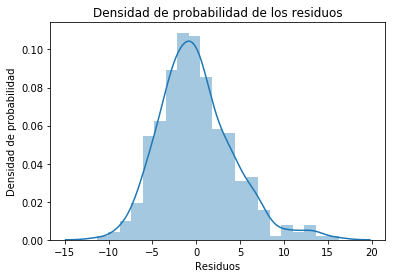

In [51]:
sns.distplot(residuos);
plt.title('Densidad de probabilidad de los residuos')
plt.xlabel("Residuos")
plt.ylabel("Densidad de probabilidad")

Los datos no parecen ser simétricos, son estirados hacia la derecha y ademas tienen una pequeña segunda protuberancia.

In [52]:
from scipy.stats import mstats
normalidad = mstats.normaltest(residuos)
normalidad.pvalue

array([6.83263715e-09])

Este test rechaza la hipótesis nula de normalidad.

Vamos ahora a realizar un QQ plot que permite no ser tan extremo en las conclusiones.

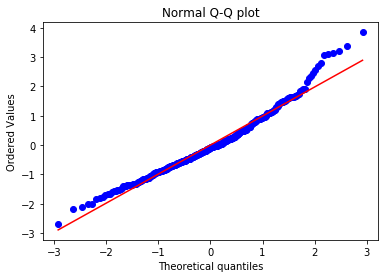

In [53]:
import scipy.stats as stats
z = (residuos-np.mean(residuos))/np.std(residuos)
z2=z.reshape(-1)
stats.probplot(z2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Encontramos que los puntos de los extremos están separados de la diagonal. Esto puede significar que los datos están un poco estirados (como se puede ver en el gráfico de densidad de probabilidad de los residuos), por lo que se podría buscar una transformación que los centre un poco más.

Sin embargo, los puntos están bastante cerca de la diagonal, por lo que se puede estar tránquilo al respecto.

Podemos intentar con transformaciones de los datos

In [64]:
y_log = np.log10(np.array(y) + 1e-10)
X_log = np.log10(np.array(X[var_escogidas]) + 1e-10)

In [67]:
regr_logy = linear_model.LinearRegression()
regr_logy.fit(X[var_escogidas], y_log)
y_pred_logy=regr_logy.predict(X[var_escogidas])
normalidad = mstats.normaltest(y_pred_logy - y)
print(normalidad.pvalue)

regr_logx = linear_model.LinearRegression()
regr_logx.fit(X_log, y)
y_pred_logx=regr_logx.predict(X_log)
normalidad = mstats.normaltest(y_pred_logx - y)
print(normalidad.pvalue)

regr_log_log = linear_model.LinearRegression()
regr_log_log.fit(X_log, y_log)
y_pred_log_log=regr_log_log.predict(X_log)
normalidad = mstats.normaltest(y_pred_log_log - y)
print(normalidad.pvalue)

[3.56249089e-05]
[2.36099208e-08]
[3.82216114e-05]


Vemos que con estas tres transformaciones no logramos no rechazar la normalidad de los residuos. Sería necesario buscar con otra transformación, por ejemplo, con una polinómica, como lo mencionamos antes.
Podríamo seguir buscandola, sin embargo, al no ser este el propósito final del curso no vamos a continuar con este camino.

### Homocedasticidad de los residuos

En el plot de los residuos con respecto a los valores ajustados vemos que no son homocedásticos, pues están mas dispersos para valores ajustados altos.

### Autocorrelación de los errores


Por su naturaleza, los datos son independientes entre ellos y no presentan una situación de auto-correlación